### 118-BUS Generator Trip Worst-Case Optimization

##### Standard pandapower 118-BUS run through power flow analysis 

In [2]:
import pandapower as pp
import pandapower.networks as pn
import pandapower.shortcircuit as sc
import matplotlib.pyplot as plt
%matplotlib inline


net000=pn.case118()
pp.runpp(net000)
print("Scenario 000: Standard 118-BUS")
print("line data")
print(net000.res_line)
print("bus data")
print(net000.res_bus)
print()

Scenario 000: Standard 118-BUS
line data
      p_from_mw  q_from_mvar     p_to_mw  q_to_mvar     pl_mw   ql_mvar  \
0    -12.353082   -13.041112   12.450690  11.006282  0.097609 -2.034830   
1    -38.646918   -17.062970   38.897009  16.884963  0.250091 -0.178008   
2   -103.228544   -26.791931  103.429430  27.492767  0.200886  0.700836   
3    -68.109884   -14.489051   69.348337  17.283597  1.238453  2.794546   
4     88.469205     4.106609  -87.538745  -1.298999  0.930460  2.807610   
..          ...          ...         ...        ...       ...       ...   
168   20.722525     5.060628  -20.641098  -6.525364  0.081427 -1.464736   
169    1.358951     0.220466   -1.358902  -0.474636  0.000049 -0.254170   
170   20.152550     5.197252  -20.000000  -8.000000  0.152550 -2.802748   
171   40.132043    23.610851  -39.791934 -23.583090  0.340109  0.027762   
172   -6.768162    -9.718318    6.791934   8.583090  0.023772 -1.135229   

     i_from_ka   i_to_ka      i_ka  vm_from_pu  va_from_de

#### Generator tripping simulation (Scenario 2 from high risk scenario pandapower v2)

In [3]:
# Scenario 2.c: Generator Tripping (Loss of Generation)
net2c = pn.case118()
net2c.gen.loc[0, 'p_mw'] = 0  # Trip the main generator
pp.runpp(net2c)
print("Scenario 2.c: Generator Tripping")
print(net2c.res_line)
print(net2c.res_bus)
print()

Scenario 2.c: Generator Tripping
      p_from_mw  q_from_mvar     p_to_mw  q_to_mvar     pl_mw   ql_mvar  \
0    -12.353082   -13.041112   12.450690  11.006282  0.097609 -2.034830   
1    -38.646918   -17.062970   38.897009  16.884963  0.250091 -0.178008   
2   -103.228544   -26.791931  103.429430  27.492767  0.200886  0.700836   
3    -68.109884   -14.489051   69.348337  17.283597  1.238453  2.794546   
4     88.469205     4.106609  -87.538745  -1.298999  0.930460  2.807610   
..          ...          ...         ...        ...       ...       ...   
168   20.722525     5.060628  -20.641098  -6.525364  0.081427 -1.464736   
169    1.358951     0.220466   -1.358902  -0.474636  0.000049 -0.254170   
170   20.152550     5.197252  -20.000000  -8.000000  0.152550 -2.802748   
171   40.132043    23.610851  -39.791934 -23.583090  0.340109  0.027762   
172   -6.768162    -9.718318    6.791934   8.583090  0.023772 -1.135229   

     i_from_ka   i_to_ka      i_ka  vm_from_pu  va_from_degree  vm

#### ChatGPT Prompt

>*this file up until this point was downloaded and uploaded into ChatGPT as a part of a prompt*

> here is a standard pandapower 118 bus along with its power flow analysis results. The second cell has a risk scenario with a generator trip on a similar standard 118 bus. Can you give me the most optimal place to trip on a standard 118 bus to do the absolute most practical damage possible to a power system 

#### ChatGPT Response

Great — I see your notebook titled optimal_risk_118.ipynb with power flow results from a standard 118-bus system and a scenario where a generator trips. To identify the most optimal location for a trip that causes the absolute worst-case (most practical) damage, here's how we should proceed methodically:

🧠 Interpretation of “Most Practical Damage”
In a real-world engineering context, the “most practical damage” due to a generator or line trip might be measured by:

1. System Instability Risk
> Excessive voltage drops at critical buses.
>
> Rotor angle divergence (out of scope for static PF but good to note).
> 
2. Overload cascades
> High overload on transmission lines (e.g., >100% loading).
> Multiple lines experiencing 90–100% stress.
> 
3. Load Loss or Voltage Collapse
> Load buses with voltage < 0.9 pu (critical under-voltage).
> Power unbalance (generation-load deficit).
> 
4. Slack Generator Stress
> Very high power injection at the slack bus (causing frequency instability).

✅ What I Will Do
> To determine the optimal trip location, I will:

>> Load the 118-bus base case and generator trip case from your notebook.

>>Evaluate the damage in the generator trip case you provided.

>> Perform a loop: trip each generator one at a time and compute:

>>> Max line loading,

>>> Number of buses under 0.95 pu,

>>> Total generation-load mismatch (if any).

> Finally, I’ll rank each case and return the worst-case generator trip.

🔄 Next Step: Run Diagnostic Analysis
> I will now open and analyze the contents of your notebook to locate:

>> The base network,

>> The risk scenario (generator trip),

>> Any existing analysis functions.

> Let me begin analyzing that now.

> Here's what I've found in the first two cells of your notebook:

> Cell 1: Standard 118-Bus System (Base Case)

>> net000 is your baseline 118-bus system.

>> This represents normal operation.

> Cell 2: Scenario 2.c – Generator Trip
> 
>> Here, you trip the first generator (gen.loc[0]), meaning its power is set to zero.
>> 
>>Then the new power flow is computed and printed.

🔍 Goal: Trip Every Generator, One by One
To find the worst-case generator trip, I will:

1. Loop through all generators in pn.case118().

2. Set each generator’s p_mw = 0 (simulate a trip).

3. Run power flow and measure:

> Number of lines over 100% load,

> Number of buses < 0.95 pu,

> Slack bus power injection increase,

> Total power imbalance (load loss or unsupplied power).

Then I’ll rank all the scenarios to identify the one causing the worst stress to the grid.

Shall I proceed with this automated analysis? 


**CL: Very insightful and detailed, surprised me personally**

#### ChatGPT prompt

yes, please generate the code that I will insert into the jupyter notebook


#### ChatGPT Response

Here’s a complete Jupyter cell that will loop through all generators in the IEEE 118-bus system, simulate one generator tripping at a time, and identify the trip that causes the most practical worst-case damage to the system.

It will analyze and rank each scenario by:

> Number of overloaded lines (>100%),

> Number of under-voltage buses (<0.95 pu),

> Slack bus overload (% increase in power supplied),

> Total generation shortfall.

In [18]:
import pandapower as pp
import pandapower.networks as pn
import pandas as pd
import numpy as np

# Base system
net_base = pn.case118()
pp.runpp(net_base)

# Get base slack bus output
slack_idx = net_base.ext_grid.index[0]
slack_bus_base_p = net_base.res_ext_grid.p_mw.values[0]

# Prepare results storage
results = []

# Loop through each generator to simulate tripping
for i in net_base.gen.index:
    net = pn.case118()  # Reload original network for each run
    gen_bus = net.gen.at[i, "bus"]
    gen_p = net.gen.at[i, "p_mw"]

    # Trip the generator by setting its output to zero
    net.gen.at[i, "p_mw"] = 0

    try:
        pp.runpp(net)

        # Evaluate impact
        n_overloaded_lines = sum(net.res_line.loading_percent > 100)
        n_low_voltage_buses = sum(net.res_bus.vm_pu < 0.95)
        slack_p = net.res_ext_grid.p_mw.values[0]
        slack_overload = slack_p - slack_bus_base_p
        generation_shortfall = gen_p  # since it was removed

        results.append({
            "gen_index": i,
            "gen_bus": gen_bus,
            "gen_p_mw": gen_p,
            "n_overloaded_lines": n_overloaded_lines,
            "n_low_voltage_buses": n_low_voltage_buses,
            "slack_overload_mw": slack_overload,
            "generation_lost": generation_shortfall,
        })
    
    except pp.LoadflowNotConverged:
        results.append({
            "gen_index": i,
            "gen_bus": gen_bus,
            "gen_p_mw": gen_p,
            "n_overloaded_lines": np.nan,
            "n_low_voltage_buses": np.nan,
            "slack_overload_mw": np.nan,
            "generation_lost": gen_p,
            "status": "Did Not Converge"
        })

# Convert to DataFrame and rank
df_results = pd.DataFrame(results)
df_results["impact_score"] = (
    df_results["n_overloaded_lines"].fillna(0)*5 +
    df_results["n_low_voltage_buses"].fillna(0)*2 +
    df_results["slack_overload_mw"].fillna(0).abs()*0.1
)

# Sort by total impact
df_results = df_results.sort_values(by="impact_score", ascending=False).reset_index(drop=True)

# Display top worst-case generator trips
print("🔧 Worst-Case Generator Trip Rankings (Top 10):")
display(df_results.head(10))


🔧 Worst-Case Generator Trip Rankings (Top 10):


,gen_index,gen_bus,gen_p_mw,n_overloaded_lines,n_low_voltage_buses,slack_overload_mw,generation_lost,impact_score
0,38,88,607.0,0,3,700.535822,607.0,76.053582
1,4,9,450.0,0,4,523.202562,450.0,60.320256
2,35,79,477.0,0,3,498.806133,477.0,55.880613
3,28,65,392.0,0,3,405.485637,392.0,46.548564
4,27,64,391.0,0,3,402.749891,391.0,46.274989
5,11,25,314.0,0,3,342.853589,314.0,40.285359
6,43,99,252.0,0,3,272.864483,252.0,33.286448
7,10,24,220.0,0,3,234.509226,220.0,29.450923
8,20,48,204.0,0,3,220.103848,204.0,28.010385
9,25,60,160.0,0,3,167.171473,160.0,22.717147


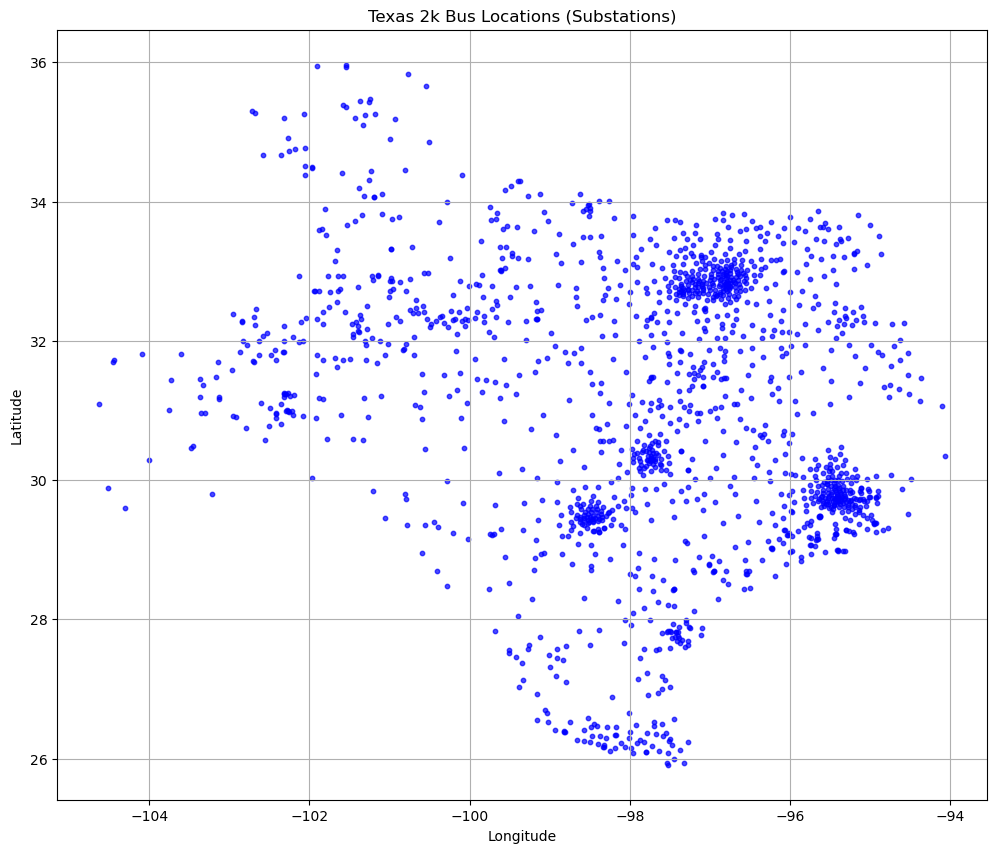

In [15]:
import matplotlib.pyplot as plt

# Sample: bus_coords is dict {bus_name: (lat, lon)}

# Step 1: Separate lat/lon for plotting
lats = [lat for lat, lon in bus_coords.values()]
lons = [lon for lat, lon in bus_coords.values()]

# Step 2: Scatter plot of bus locations (as points)
plt.figure(figsize=(12,10))
plt.scatter(lons, lats, s=10, color='blue', alpha=0.7)
plt.title("Texas 2k Bus Locations (Substations)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
